In [2]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Define the threshold for setting text color
    thresh = cm.max() / 2.
    
    # Iterate over the data and create text annotations with contrast.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Classification Report for State Classification:
              precision    recall  f1-score   support

        rest       0.29      0.25      0.27         8
       sleep       0.62      0.67      0.65        15

    accuracy                           0.52        23
   macro avg       0.46      0.46      0.46        23
weighted avg       0.51      0.52      0.51        23



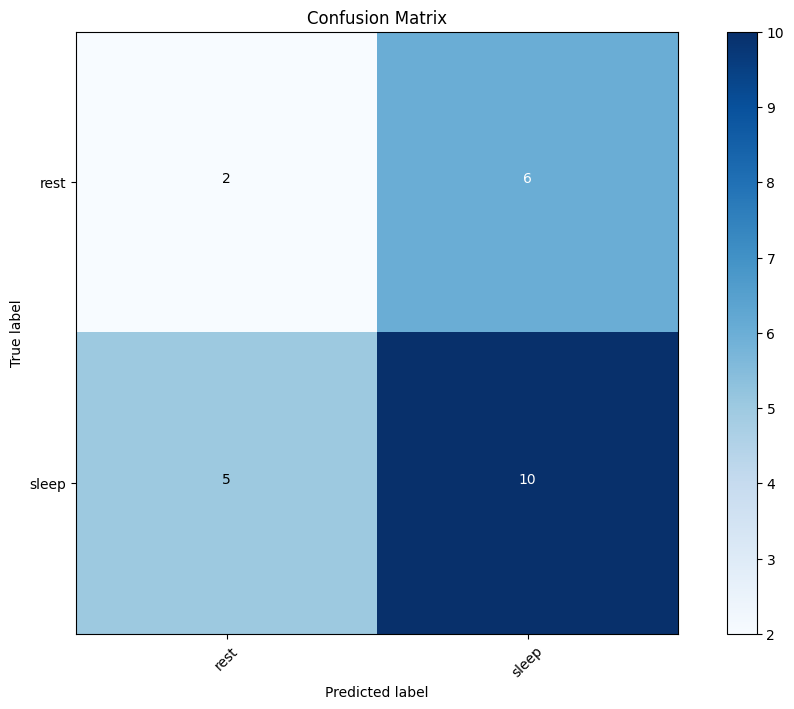

In [6]:

# Load the data from the CSV file
file_path = '/Users/pranayjain/University of Freiburg/4th Semster/Psycology Project/python_scripts/output_directory/evaluation_dataset/hurst_evaluation/ho_slope_1byf_all.csv'
data = pd.read_csv(file_path)

# Prepare the feature data and labels
features = data.iloc[:, 5:] 
states = data['state']
sleep_stages = data['sleep_stage']

# Split data for state classification (rest vs sleep)
X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(
    features, states, test_size=0.2, random_state=42)

# Linear Discriminant Analysis for state classification
lda_state = LinearDiscriminantAnalysis()
lda_state.fit(X_train_state, y_train_state)
state_predictions = lda_state.predict(X_test_state)

# Performance evaluation for state classification
state_cm = confusion_matrix(y_test_state, state_predictions)
state_report = classification_report(y_test_state, state_predictions)


plot_confusion_matrix(state_cm, lda_state.classes_, title='Confusion Matrix', cmap=plt.cm.Blues)
print("Classification Report for State Classification:")
print(state_report)


Classification Report for Sleep Stage Classification:
              precision    recall  f1-score   support

           1       0.25      0.17      0.20         6
           2       0.44      0.44      0.44         9
           W       0.33      0.43      0.38         7

    accuracy                           0.36        22
   macro avg       0.34      0.35      0.34        22
weighted avg       0.36      0.36      0.36        22



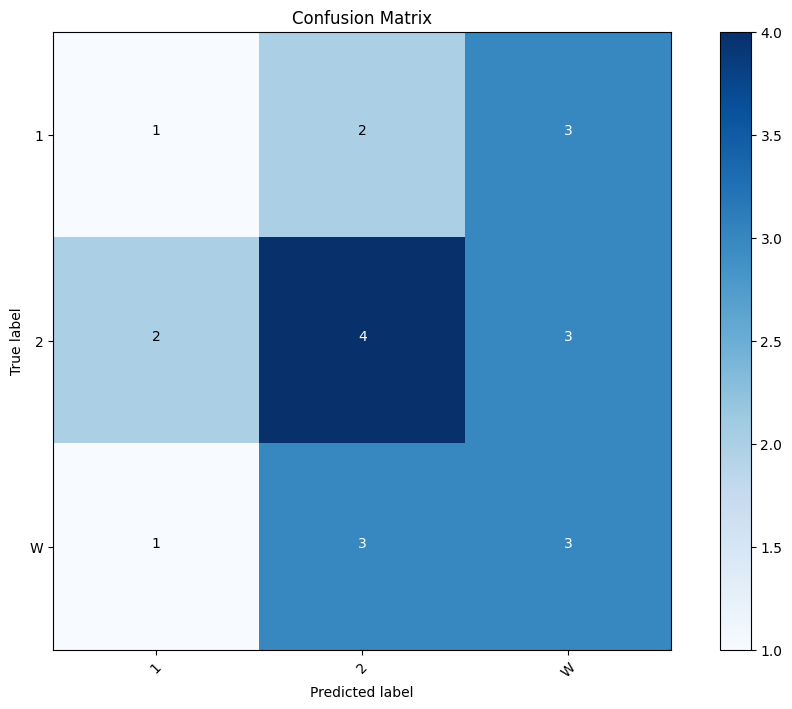

In [7]:
# Now preparing for sleep stage classification among 'W', '1', '2'
# Filter data for sleep stages only
sleep_data = data[data['sleep_stage'].isin(['W', '1', '2'])]
features_sleep = sleep_data.iloc[:, 5:]
sleep_stages_sleep = sleep_data['sleep_stage']

# Split data for sleep stage classification
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(
    features_sleep, sleep_stages_sleep, test_size=0.2, random_state=42)

# Linear Discriminant Analysis for sleep stage classification
lda_sleep = LinearDiscriminantAnalysis()
lda_sleep.fit(X_train_sleep, y_train_sleep)
sleep_predictions = lda_sleep.predict(X_test_sleep)

# Performance evaluation for sleep stage classification
sleep_cm = confusion_matrix(y_test_sleep, sleep_predictions)
sleep_report = classification_report(y_test_sleep, sleep_predictions)


plot_confusion_matrix(sleep_cm, lda_sleep.classes_, title='Confusion Matrix', cmap=plt.cm.Blues)
print("Classification Report for Sleep Stage Classification:")
print(sleep_report)

Leave one out Strategy

Leave-One-Out Cross-Validation Average Accuracy for REST vs SLEEP: 0.55


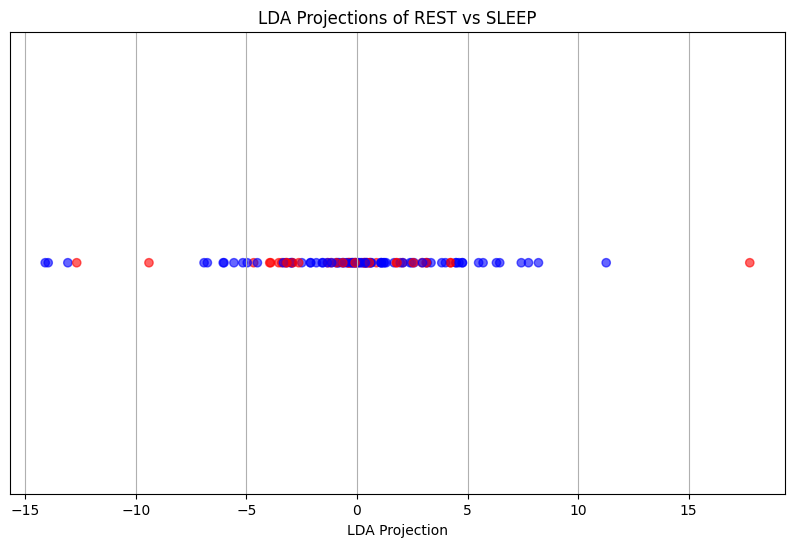

In [4]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
file_path = '/Users/pranayjain/University of Freiburg/4th Semster/Psycology Project/python_scripts/output_directory/evaluation_dataset/hurst_evaluation/ho_slope_1byf_all.csv'
data = pd.read_csv(file_path)

# Prepare the feature data and labels
features = data.iloc[:, 5:]
states = data['state']

# Initialize LeaveOneOut object
loo = LeaveOneOut()

# Variables to collect performance metrics
accuracy_scores = []
projections = []
labels = []

# Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(features):
    # Split the data
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = states.iloc[train_index], states.iloc[test_index]

    # Initialize the LDA model
    lda_state = LinearDiscriminantAnalysis()

    # Train the model
    lda_state.fit(X_train, y_train)
    
    # Project the test data
    X_test_projected = lda_state.transform(X_test)
    projections.extend(X_test_projected.flatten())  # Store projections
    labels.append(y_test.values[0]) 
    
    # Make predictions
    prediction = lda_state.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, prediction)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy over all cross-validation runs
average_accuracy = np.mean(accuracy_scores)
print(f"Leave-One-Out Cross-Validation Average Accuracy for REST vs SLEEP: {average_accuracy:.2f}")

# Plotting the projections
colors = {'rest': 'red', 'sleep': 'blue'}
plt.figure(figsize=(10, 6))
plt.scatter(projections, np.zeros_like(projections), c=[colors[label] for label in labels], alpha=0.6)
plt.title('LDA Projections of REST vs SLEEP')
plt.xlabel('LDA Projection')
plt.yticks([])  # Hide y-axis as it's not informative in this case
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
file_path = '/Users/pranayjain/University of Freiburg/4th Semster/Psycology Project/python_scripts/output_directory/evaluation_dataset/hurst_evaluation/ho_slope_1byf_all.csv'
data = pd.read_csv(file_path)

# Prepare the feature data and labels
sleep_data = data[data['sleep_stage'].isin(['W', '1', '2'])]
features_sleep = sleep_data.iloc[:, 5:]
sleep_stages_sleep = sleep_data['sleep_stage']

# Initialize LeaveOneOut object
loo = LeaveOneOut()

# Variables to collect performance metrics
accuracy_scores = []

# Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(features_sleep):
    # Split the data
    X_train, X_test = features_sleep.iloc[train_index], features_sleep.iloc[test_index]
    y_train, y_test = sleep_stages_sleep.iloc[train_index], sleep_stages_sleep.iloc[test_index]

    # Initialize the LDA model
    lda_state = LinearDiscriminantAnalysis()

    # Train the model
    lda_state.fit(X_train, y_train)
    
    # Make predictions
    prediction = lda_state.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, prediction)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy over all cross-validation runs
average_accuracy = np.mean(accuracy_scores)
print(f"Leave-One-Out Cross-Validation Average Accuracy for W vs 1 vs 2: {average_accuracy:.2f}")


Leave-One-Out Cross-Validation Average Accuracy for W vs 1 vs 2: 0.29


K-fold

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the dataset
file_path = '/Users/pranayjain/University of Freiburg/4th Semster/Psycology Project/python_scripts/output_directory/evaluation_dataset/hurst_evaluation/ho_slope_1byf_all.csv'
data = pd.read_csv(file_path)

# Prepare features and labels
features = data.iloc[:, 5:]
labels = data['state']

# Initialize KFold with k=6
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Variables to store accuracy scores
accuracy_scores = []

# K-fold Cross-Validation
for train_index, test_index in kf.split(features):
    # Split data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

    # Initialize and train LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Predict on test set
    y_pred = lda.predict(X_test)

    # Compute accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy:{accuracy} ")
    accuracy_scores.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f"K-fold Cross-Validation Average Accuracy: {average_accuracy:.2f}")


Accuracy:0.631578947368421 
Accuracy:0.631578947368421 
Accuracy:0.5789473684210527 
Accuracy:0.5263157894736842 
Accuracy:0.42105263157894735 
Accuracy:0.7222222222222222 
K-fold Cross-Validation Average Accuracy: 0.59
